# Voraussetzung: Packages installieren

In [7]:
%pip install -r req_KMeans.txt

Note: you may need to restart the kernel to use updated packages.


# 1. Bibliotheken importieren

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 2. Datensatz laden

In [9]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")  

# 3. Daten bereinigen

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

# 4. Zielspalte entfernen

In [ ]:
df_unsupervised = df.drop("Churn", axis=1)

# 5. Kategorische Features kodieren und Feature Engineering

In [12]:
label_encoders = {}
for col in df_unsupervised.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_unsupervised[col] = le.fit_transform(df_unsupervised[col])
    label_encoders[col] = le

# Neue Features
df_unsupervised["MonthlyChargeRatio"] = df_unsupervised["MonthlyCharges"] / (df_unsupervised["tenure"] + 1)
df_unsupervised["AvgMonthlyCharge"] = df_unsupervised["TotalCharges"] / (df_unsupervised["tenure"] + 1)

# 6. Skalieren

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_unsupervised)

# 7. K-Means Clustering

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 8. Cluster-Ergebnisse anhängen

In [15]:
df["Cluster"] = clusters

# 9. Visualisierung der Cluster (per PCA auf 2D reduziert)

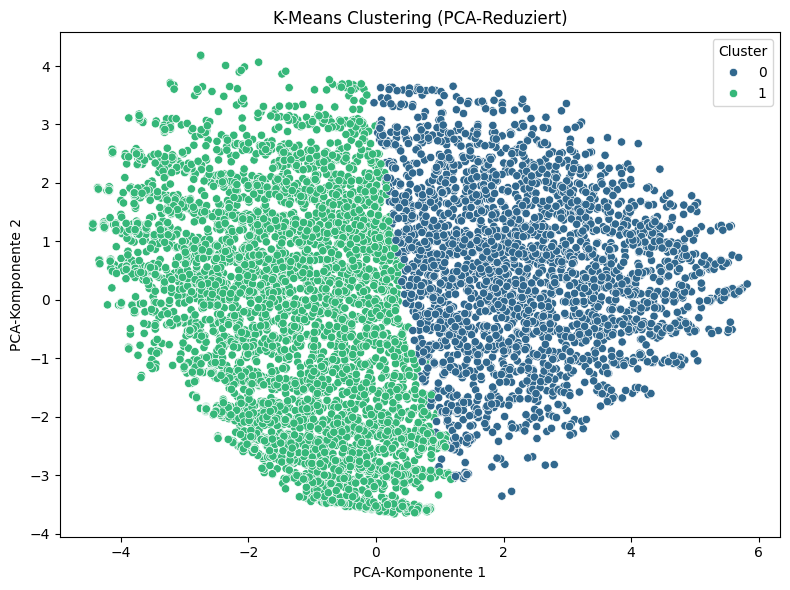

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis")
plt.title("K-Means Clustering (PCA-Reduziert)")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# 10. Vergleich: Stimmen Cluster mit Churn (nur zur Analyse) und Silhouette-Score

In [17]:
cross_tab = pd.crosstab(df["Cluster"], df["Churn"])
print("Vergleich von Clustern mit tatsächlichem Churn:\n")
print(cross_tab)

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 2))

Vergleich von Clustern mit tatsächlichem Churn:

Churn       0     1
Cluster            
0        2178   435
1        2985  1434
Silhouette Score: 0.16
